# Text Generation

In [17]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

### Helping Functions

In [19]:
 
def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [20]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

## Step 1 : Get the Corpus

In [21]:
# Read the dataset from csv - just first 10 songs for now
path = tf.keras.utils.get_file('songdata.csv', 
                               'https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8')
print (path)

C:\Users\Amir\.keras\datasets\songdata.csv


In [22]:
dataset = pd.read_csv(path, dtype=str)[:10]

In [23]:
corpus = create_lyrics_corpus(dataset, 'text')

## Step 2 : Tokenize the Corpus

In [24]:
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus)

In [25]:
total_words = len(tokenizer.word_index) + 19  # why 19?

In [26]:
#print(tokenizer.word_index)
print(total_words)

513


In [27]:
dataset.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face its a wonderful face \nand i...
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please \ntouch me gently...
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,ill never know why i had to go \nwhy i had to...
3,ABBA,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...


## Step 3 : Create n-Gram

In [28]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

## Step 4 : Pad sequences

In [29]:
# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

## Step 5 : X and y - Values

In [30]:
# Split sequences between the "input" sequence and "output" predicted word
X  = sequences[:,:-1] 
y_label  = sequences[:,-1]
# One-hot encode the labels
y = tf.keras.utils.to_categorical(y_label, num_classes = total_words)

### Explore and Trace

In [31]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(X[5])
print(X[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(y[5])
print(y[6])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]
[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Step 6 : Create Model

In [33]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
history = model.fit(X, y, epochs=200, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 64)            32832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense_1 (Dense)              (None, 513)               21033     
Total params: 67,465
Trainable params: 67,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
62/62 [==============================] - 1s 11ms/step - loss: 6.0171 - accuracy: 0.0303 0s - loss: 6.0706 - accuracy: 0.
Epoch 2/200
62/62 [==============================] - 1s 10ms/step - loss: 5.4445 - accuracy: 0.0343
Epoch 3/200
62/62 [==============================] - 1s 10ms/step - loss: 5.3752 - accuracy: 0.0419
Epoch 4/200
62/62 [============================

In [34]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

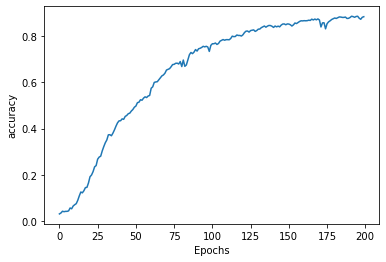

In [35]:
plot_graphs(history, 'accuracy')

## Step 7 : Generate Text

In [36]:
seed_text = "im feeling chills"
next_words = 100

In [37]:
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

im feeling chills your music and i do what a walk in my stuff tomorrow talking walk am am am am am more more more more more more more slack seems but no blown thought thought morning thought thought morning closed would weave realized its new new found new love found true crazy wonderful plan shoulder hour am am am am more more more more more more slack more more so seems figure quiet here i realized realized realized its blue think do crazy wonderful didnt do may just advice dreamed realized dreamed chiquitita true shoulder new to dont thought would realized do
